In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import pandas as pd
import math
import seaborn as sns

In [7]:
df = pd.read_csv('data1.csv')
df.head()

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,TYPE,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,4.161290,-122.500,41.5,26.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
1,-122.500,41.5,4.161290,-122.500,41.5,36.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
2,-122.500,41.5,4.161290,-122.500,41.5,19.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
3,-113.125,38.0,5.384007,-113.125,38.0,44.8,GEOTHERMAL,0.0,0.0,0.0
4,-111.875,44.0,6.046074,-111.875,44.0,6.7,CONVENTIONAL HYDROELECTRIC,0.0,0.0,0.0


In [125]:
df = df.dropna()

In [207]:
len(df)

80691

In [208]:
df['COAL_USED'].value_counts()

 0.0          69943
-999999.0      7966
 4215853.0        7
 174464.0         7
 53288.0          7
              ...  
 145081.0         1
 3225966.0        1
 261026.0         1
 6435498.0        1
 2943.0           1
Name: COAL_USED, Length: 952, dtype: int64

In [126]:
df_wind = df[df['TYPE'].str.contains('WIND')]

In [127]:
df_wind = df_wind.reset_index()

In [128]:
df_wind.head()

,index,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,TYPE,COAL_USED,NGAS_USED,OIL_USED
0,270,-163.125,66.5,6.009210,-163.125,66.5,17.5,BATTERIES; ONSHORE WIND TURBINE; PETROLEUM LIQ...,0.0,0.0,31368.0
1,542,-88.125,44.5,7.222385,-88.125,44.5,0.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
2,552,-73.125,42.5,4.083856,-73.125,42.5,6.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
3,606,-72.500,42.0,3.834629,-72.500,42.0,3.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
4,617,-121.875,38.0,4.627170,-121.875,38.0,228.2,ONSHORE WIND TURBINE,0.0,0.0,0.0


In [209]:
len(df_wind)

8966

In [129]:
df_wind['OPER_CAP'].value_counts()

 0.0         1139
-999999.0     379
 150.0        251
 10.0         203
 1.5          199
             ... 
 79.7           1
 49.6           1
 146.2          1
 96.7           1
 8.8            1
Name: OPER_CAP, Length: 487, dtype: int64

In [388]:
df_wind['OIL_USED'].describe()

count      8966.000000
mean     -87816.274593
std      283173.171948
min     -999999.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       44685.000000
Name: OIL_USED, dtype: float64

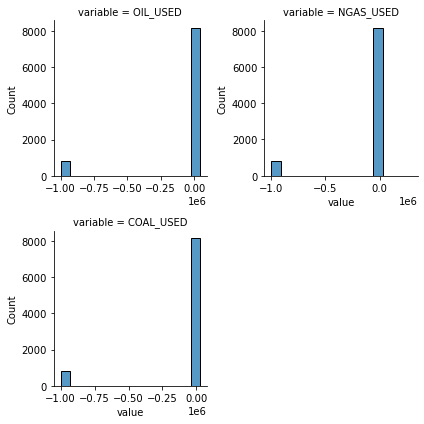

In [387]:
f = pd.melt(df_wind, value_vars=['OIL_USED','NGAS_USED','COAL_USED'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

In [135]:
df_new = df_wind.drop(df_wind[(df_wind['OPER_CAP']==-999999)| (df_wind['OPER_CAP']==0)].index)
df_new = df_new.drop(columns=['index'])

In [136]:
df_new

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,TYPE,COAL_USED,NGAS_USED,OIL_USED
0,-163.125,66.5,6.009210,-163.125,66.5,17.5,BATTERIES; ONSHORE WIND TURBINE; PETROLEUM LIQ...,0.0,0.0,31368.0
2,-73.125,42.5,4.083856,-73.125,42.5,6.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
3,-72.500,42.0,3.834629,-72.500,42.0,3.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
4,-121.875,38.0,4.627170,-121.875,38.0,228.2,ONSHORE WIND TURBINE,0.0,0.0,0.0
6,-100.000,42.5,10.126925,-100.000,42.5,3.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8947,-97.500,37.5,4.678155,-97.500,37.5,243.5,ONSHORE WIND TURBINE,0.0,0.0,0.0
8948,-101.875,36.5,5.714166,-101.875,36.5,80.0,ONSHORE WIND TURBINE,0.0,0.0,0.0
8951,-73.750,42.5,3.932154,-73.750,42.5,1.5,ONSHORE WIND TURBINE,0.0,0.0,0.0
8958,-77.500,43.0,5.687595,-77.500,43.0,1.7,NATURAL GAS FIRED COMBUSTION TURBINE; ONSHORE ...,0.0,0.0,0.0


In [137]:
df_new.describe()

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,COAL_USED,NGAS_USED,OIL_USED
count,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000
mean,-99.237044,39.979323,6.851709,-99.237044,39.979323,81.317723,-83642.630639,-82575.580961,-82620.957304
std,14.669892,5.300096,2.380664,14.669892,5.300096,88.426998,276876.776260,276160.580548,275487.673699
min,-165.625000,17.500000,1.712162,-165.625000,17.500000,0.100000,-999999.000000,-999999.000000,-999999.000000
25%,-105.000000,36.000000,4.839654,-105.000000,36.000000,9.600000,0.000000,0.000000,0.000000
50%,-98.125000,41.500000,6.473209,-98.125000,41.500000,51.000000,0.000000,0.000000,0.000000
75%,-93.125000,43.500000,8.481256,-93.125000,43.500000,130.500000,0.000000,0.000000,0.000000
max,-66.250000,66.500000,19.251116,-66.250000,66.500000,735.500000,26839.000000,286347.000000,44685.000000


In [139]:
df4 = df_new.drop(df_new[(df_new['OIL_USED']==-999999)| (df_new['OIL_USED']==0)].index)
df_new.loc[(df_new['OIL_USED']==-999999),"OIL_USED"] = df4['OIL_USED'].mean()
df_new.loc[(df_new['OIL_USED']==0),"OIL_USED"] = min(df4['OIL_USED'])

In [140]:
df5 = df_new.drop(df_new[(df_new['NGAS_USED']==-999999)| (df_new['NGAS_USED']==0)].index)
df_new.loc[(df_new['NGAS_USED']==-999999),"NGAS_USED"] = df5['NGAS_USED'].mean()
df_new.loc[(df_new['NGAS_USED']==0),"NGAS_USED"] = min(df5['NGAS_USED'])

In [141]:
df6 = df_new.drop(df_new[(df_new['COAL_USED']==-999999)| (df_new['COAL_USED']==0)].index)
df_new.loc[(df_new['COAL_USED']==-999999),'COAL_USED'] = df6['COAL_USED'].mean()
df_new.loc[(df_new['COAL_USED']==0),"COAL_USED"] = min(df6['COAL_USED'])

In [142]:
df_new.describe()

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,COAL_USED,NGAS_USED,OIL_USED
count,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000
mean,-99.237044,39.979323,6.851709,-99.237044,39.979323,81.317723,816.505236,6909.843801,1170.337535
std,14.669892,5.300096,2.380664,14.669892,5.300096,88.426998,1254.747784,23652.194365,3806.289344
min,-165.625000,17.500000,1.712162,-165.625000,17.500000,0.100000,445.000000,12.000000,54.000000
25%,-105.000000,36.000000,4.839654,-105.000000,36.000000,9.600000,445.000000,12.000000,54.000000
50%,-98.125000,41.500000,6.473209,-98.125000,41.500000,51.000000,445.000000,12.000000,54.000000
75%,-93.125000,43.500000,8.481256,-93.125000,43.500000,130.500000,445.000000,12.000000,54.000000
max,-66.250000,66.500000,19.251116,-66.250000,66.500000,735.500000,26839.000000,286347.000000,44685.000000


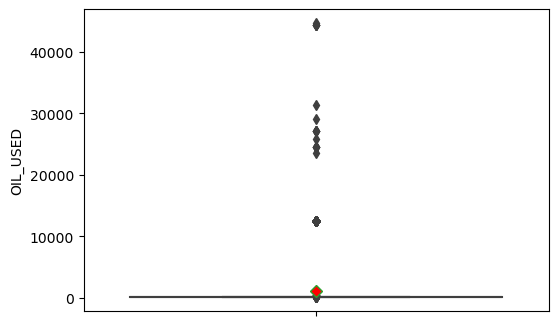

In [211]:
plt.figure(dpi=100)
sns.boxplot(y=df_new['OIL_USED'],
            showmeans=True,
            meanprops = {'marker':'D','markerfacecolor':'red'},
           )
plt.show()

In [214]:
df_new['OIL_USED'].value_counts()

54.000000       6782
12519.490196     616
55.000000          5
27071.000000       5
44292.000000       5
372.000000         5
81.000000          5
217.000000         5
24528.000000       5
92.000000          5
44685.000000       1
23476.000000       1
89.000000          1
202.000000         1
31368.000000       1
29042.000000       1
102.000000         1
71.000000          1
25781.000000       1
84.000000          1
Name: OIL_USED, dtype: int64

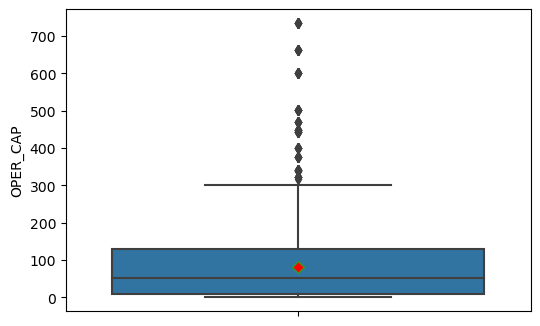

In [145]:
plt.figure(dpi=100)
sns.boxplot(y=df_new['OPER_CAP'],
            showmeans=True,
            meanprops = {'marker':'D','markerfacecolor':'red'},
           )
plt.show()

In [149]:
reg_df = df_new[['OPER_CAP','speed','OIL_USED','COAL_USED','NGAS_USED']]

In [261]:
reg_df = reg_df.reset_index()

In [369]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import Normalizer
df_std = reg_df.copy()
df_std[['COAL_USED','OIL_USED','NGAS_USED']] = StandardScaler().fit_transform(df_std[['COAL_USED','OIL_USED','NGAS_USED']])
df_std[['speed']] = StandardScaler().fit_transform(df_std[['speed']])
df_std[['OPER_CAP']] = StandardScaler().fit_transform(df_std[['OPER_CAP']])

In [370]:
df_std=df_std.drop(columns=['index'])

In [371]:
df_std.head()

,OPER_CAP,speed,OIL_USED,COAL_USED,NGAS_USED
0,-0.721748,-0.353916,7.934155,-0.296099,-0.291656
1,-0.851807,-1.162718,-0.293307,-0.296099,-0.291656
2,-0.885736,-1.267413,-0.293307,-0.296099,-0.291656
3,1.661168,-0.934483,-0.293307,-0.296099,-0.291656
4,-0.885736,1.375850,-0.293307,-0.296099,-0.291656


In [372]:
X = df_std.drop(columns=['OPER_CAP'])
y = df_std[['OPER_CAP']]

In [373]:
#X_std = X_std.reset_index()

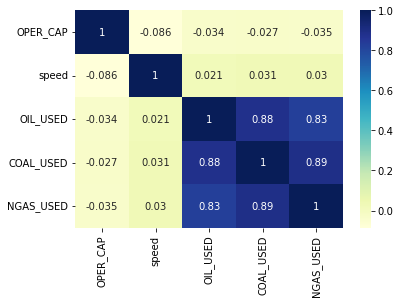

In [375]:
sns.heatmap(df_std.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [340]:
X_lr = df_std.drop(columns=['OPER_CAP'])
y = df_std['OPER_CAP']

In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression().fit(X_train, y_train)


In [345]:
'intercept:'+ str(lr.intercept_)

sorted(dict(zip(X_std.columns, lr.coef_)).items(), key=lambda x:x[1], reverse=True)

[('speed', -52.85224832637091),
 ('COAL_USED', -58.088645860615856),
 ('NGAS_USED', -62.930477397493966),
 ('OIL_USED', -112.23512567870915)]

In [390]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = lr.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)     

In [391]:
r2

0.008802936687062446

In [353]:
mse

8543.265214916539

In [349]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)
y_pred_svr = svr_rbf.predict(X_test)

In [407]:
r2 = r2_score(y_test, y_pred_svr)
r2

-0.09576856708903247

In [354]:
mean_squared_error(y_test, y_pred_svr) 

9441.915529596035

In [383]:
d = {
    'Feature': X_train.columns,
    'Importance': abs(lr.coef_)
}
dt_imp = pd.DataFrame(d)
dt_imp = dt_imp.sort_values('Importance', ascending=False)
dt_imp.index = range(len(dt_imp))
(dt_imp['Importance']!=0).sum(), (dt_imp['Importance']==0).sum()

(4, 0)

In [384]:
d

{'Feature': Index(['speed', 'OIL_USED', 'COAL_USED', 'NGAS_USED'], dtype='object'),
 'Importance': array([ 52.85224833, 112.23512568,  58.08864586,  62.9304774 ])}

Text(0.5, 1.0, 'Feature Importance from lr')

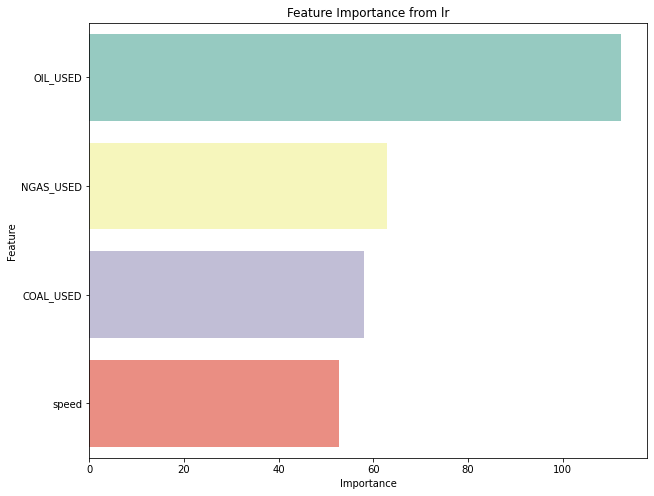

In [406]:
plt.figure(figsize=(10,8))
sns.barplot(data=dt_imp[dt_imp['Importance']!=0][:10], y='Feature', x='Importance', palette='Set3')
plt.title('Feature Importance from lr')

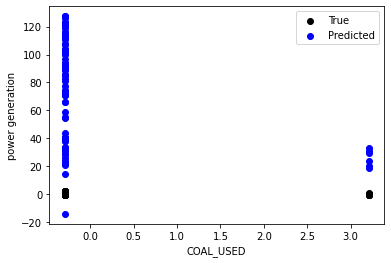

In [405]:
subsample_index = np.random.randint(low=0, high=len(y_pred), size=100)
plt.scatter(X['COAL_USED'].iloc[subsample_index],y.iloc[subsample_index], color='black')
plt.scatter(X['COAL_USED'].iloc[subsample_index], svr_rbf.predict(X.iloc[subsample_index]), color='blue')
plt.xlabel('COAL_USED')
plt.ylabel('power generation')
plt.legend(['True','Predicted'],loc='upper right')
plt.show()